In [1]:
# Step 1: Import libraries
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("Titanic-Dataset.csv")

# View first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Total missing values per column (finding missing values)
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# encoding is the next task as ML works with numbers 

# Convert 'Sex' to numeric: male = 0, female = 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' (creates 3 new columns: Embarked_C, Embarked_Q, Embarked_S)
 # df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)  we commented this because we already ran it and it changed the dataset .

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,8.0500,NaN,False,True


In [16]:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform Age and Fare
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
df[['Age', 'Fare']].describe()


,Age,Fare
count,714.000000,8.910000e+02
mean,0.000000,3.987333e-18
std,1.000701,1.000562e+00
min,-2.016979,-6.484217e-01
25%,-0.659542,-4.891482e-01
50%,-0.117049,-3.573909e-01
75%,0.571831,-2.424635e-02
max,3.465126,9.667167e+00


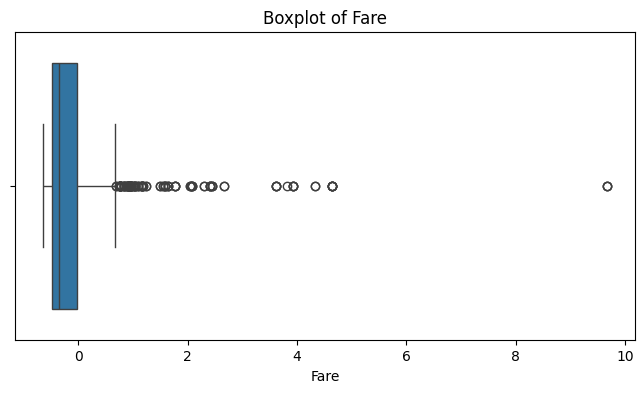

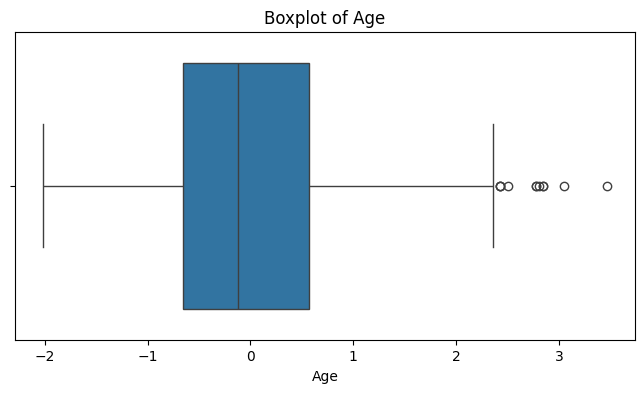

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


# Boxplot for Fare
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")
plt.show()

# Boxplot for Age
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()


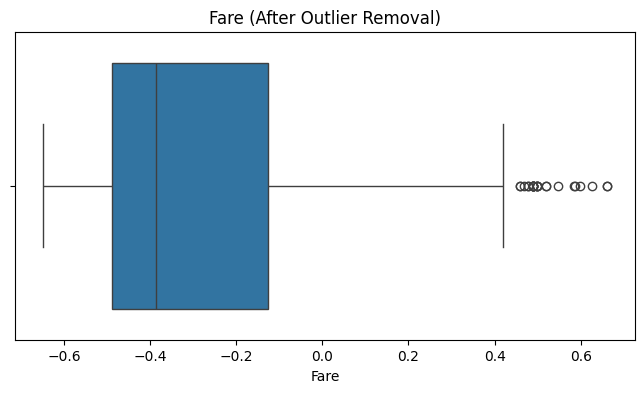

In [ ]:
# Calculate IQR for Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out Fare outliers
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]


# plt.figure(figsize=(8, 4))
# sns.boxplot(x=df['Fare'])
# plt.title("Fare (After Outlier Removal)")
# plt.show()
